In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2233, '28 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['high'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.00000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.00620
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.00620
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.00130
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.00830
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.00071
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.00294
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.00332
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,-0.00061


<IPython.core.display.Javascript object>


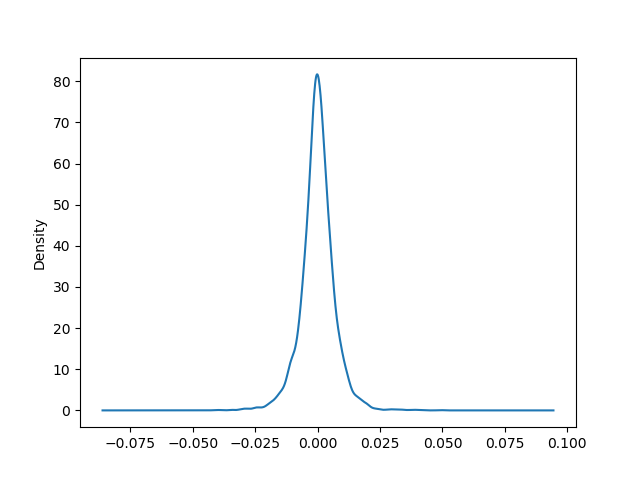

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.00000,0.00620,0.00620,0.00130,-0.00830
1,0.00620,0.00620,0.00130,-0.00830,-0.00270
2,0.00620,0.00130,-0.00830,-0.00270,0.00360
3,0.00130,-0.00830,-0.00270,0.00360,0.00290
4,-0.00830,-0.00270,0.00360,0.00290,-0.00540
...,...,...,...,...,...
5162,-0.00362,-0.00123,-0.00045,-0.00183,0.00071
5163,-0.00123,-0.00045,-0.00183,0.00071,0.00294
5164,-0.00045,-0.00183,0.00071,0.00294,0.00332
5165,-0.00183,0.00071,0.00294,0.00332,-0.00061


In [9]:
from Bayesian import *

In [10]:
x=wn['d1']
y=wn['d2']
data=np.array([x,y])
robust_model = analyze_robust(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

                      mean            sd      mc_error       hpd_2.5  \
mu__0        -1.000003e+02  3.818961e-06  3.790763e-07 -1.000003e+02   
mu__1         1.000007e+02  8.204866e-06  8.183586e-07  1.000007e+02   
sigma__0      9.998119e-04  1.869416e-07  1.196839e-08  9.994288e-04   
sigma__1      9.998260e-04  1.295528e-07  1.259540e-08  9.995797e-04   
r            -2.144112e-01  3.776468e-08  3.706773e-09 -2.144113e-01   
cov__0_0      9.996238e-07  3.737476e-10  2.392891e-11  9.988580e-07   
cov__0_1     -2.143336e-07  4.882441e-11  3.717126e-12 -2.144091e-07   
cov__1_0     -2.143336e-07  4.882441e-11  3.717126e-12 -2.144091e-07   
cov__1_1      9.996520e-07  2.590488e-10  2.518525e-11  9.991596e-07   
nu_minus_one  1.000000e+00  1.148750e-08  1.144375e-09  1.000000e+00   
nu            2.000000e+00  1.148750e-08  1.144375e-09  2.000000e+00   

                  hpd_97.5  
mu__0        -1.000003e+02  
mu__1         1.000007e+02  
sigma__0      9.999999e-04  
sigma__1      9.999

<IPython.core.display.Javascript object>


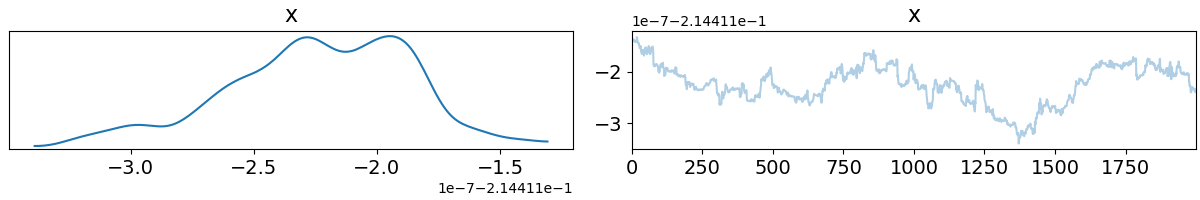

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DF29CF9C8>,
      dtype=object)

In [11]:
pm.traceplot(robust_trace['r'])

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


<IPython.core.display.Javascript object>


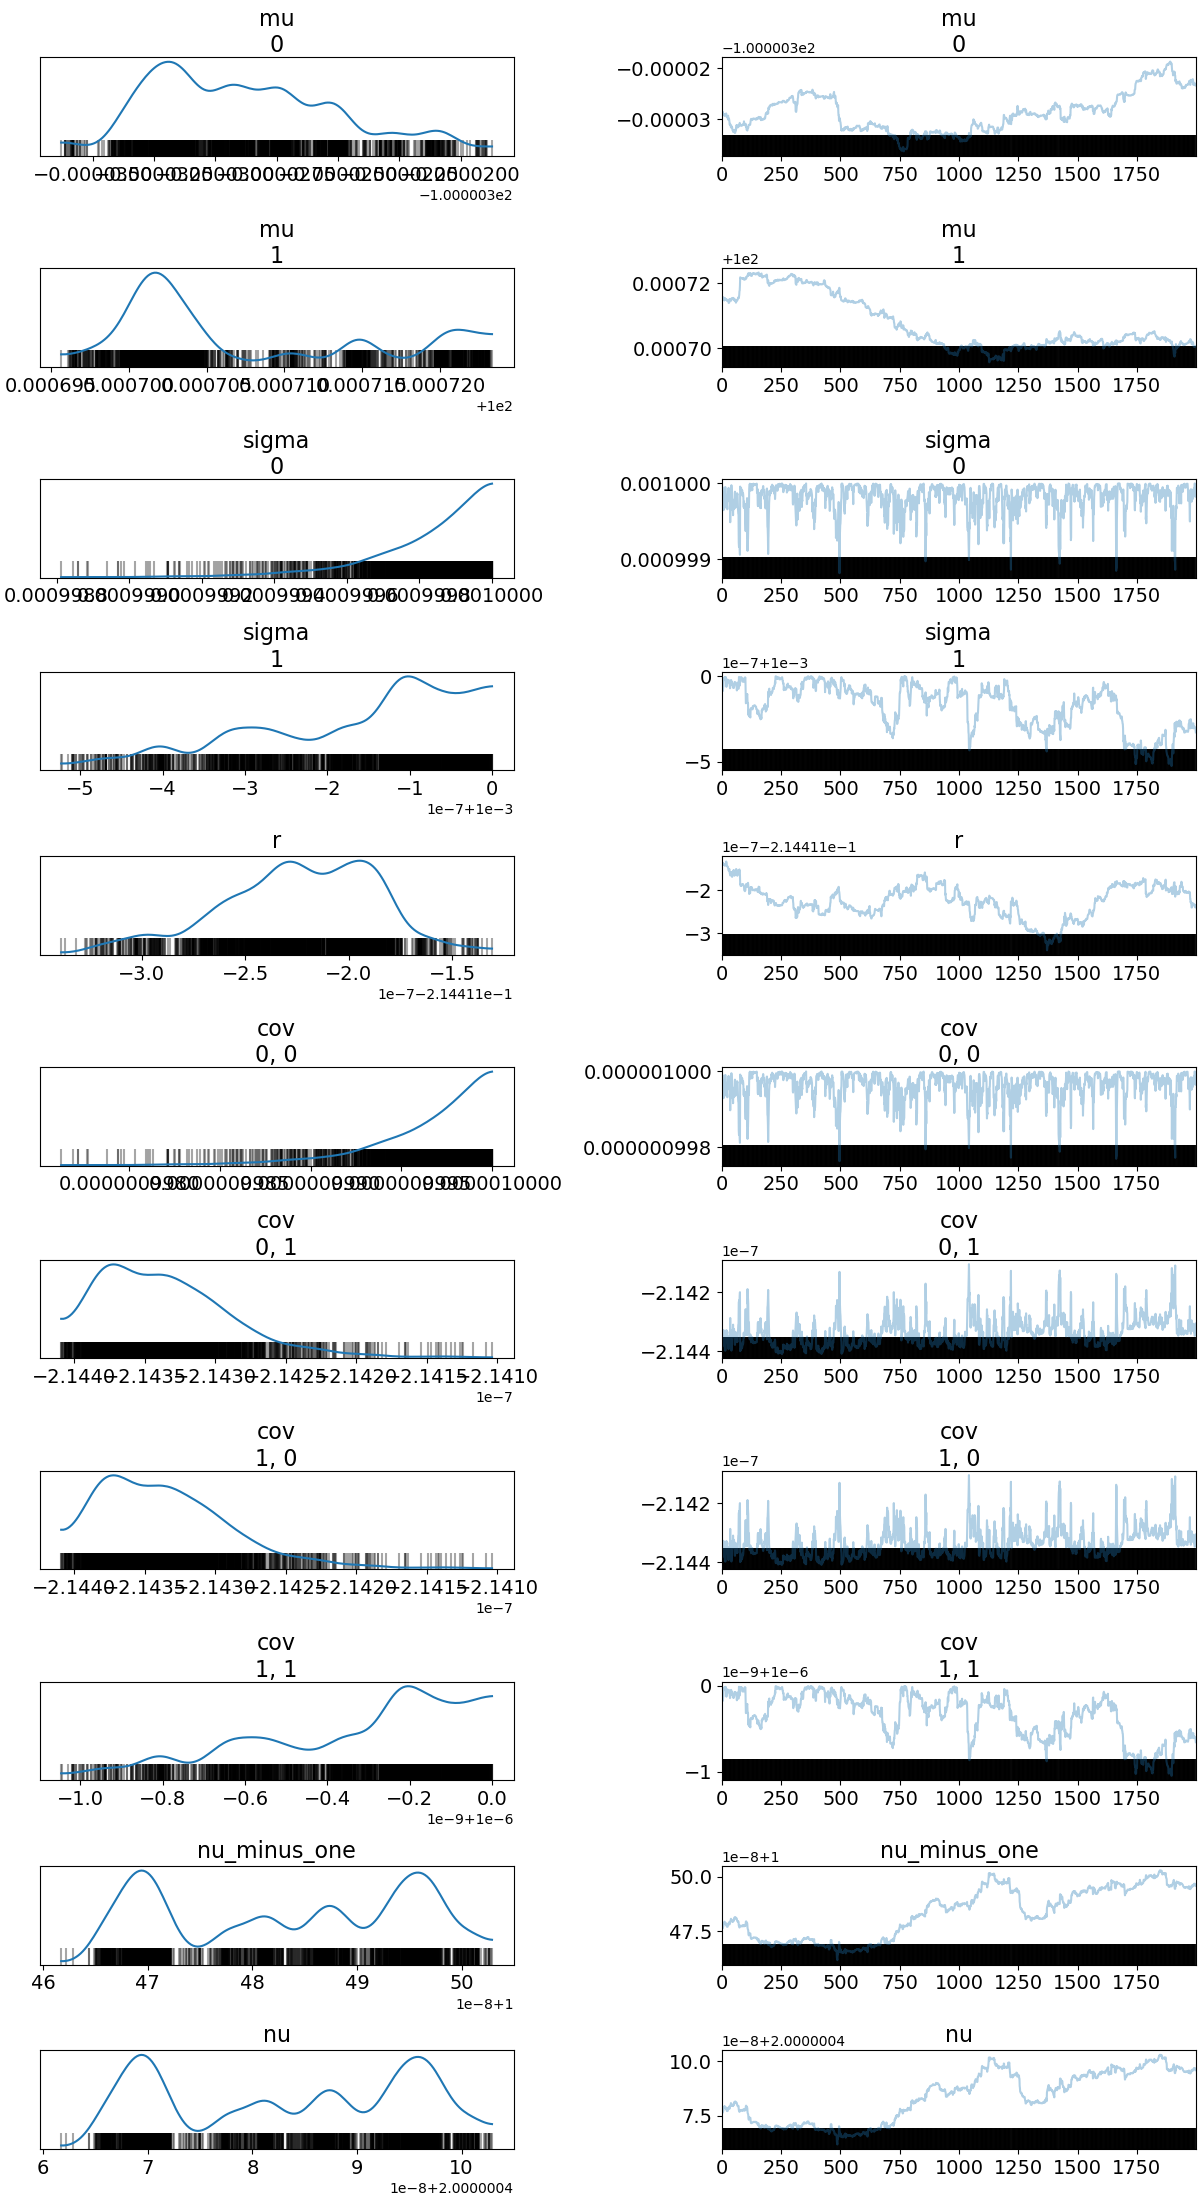

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DF73C1B08>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace)

In [13]:
from Bayesian1 import *

In [14]:
data1=wn.iloc[:,0:2].values
robust_model = analyze_robust1(data1)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

              mean            sd      mc_error   hpd_2.5  hpd_97.5
mu__0     0.000146  8.086160e-05  1.680566e-06 -0.000003  0.000307
mu__1     0.000032  7.736414e-05  1.437868e-06 -0.000119  0.000181
sigma__0  0.004905  7.400264e-05  1.660555e-06  0.004766  0.005052
sigma__1  0.004904  7.373039e-05  1.783588e-06  0.004760  0.005045
r         0.110942  1.570759e-02  3.268951e-04  0.078484  0.139997
cov__0_0  0.000024  7.263071e-07  1.628442e-08  0.000023  0.000026
cov__0_1  0.000003  3.922434e-07  8.098271e-09  0.000002  0.000003
cov__1_0  0.000003  3.922434e-07  8.098271e-09  0.000002  0.000003
cov__1_1  0.000024  7.232871e-07  1.748915e-08  0.000023  0.000025
nu        3.892444  1.609332e-01  4.158613e-03  3.590596  4.202555


<IPython.core.display.Javascript object>


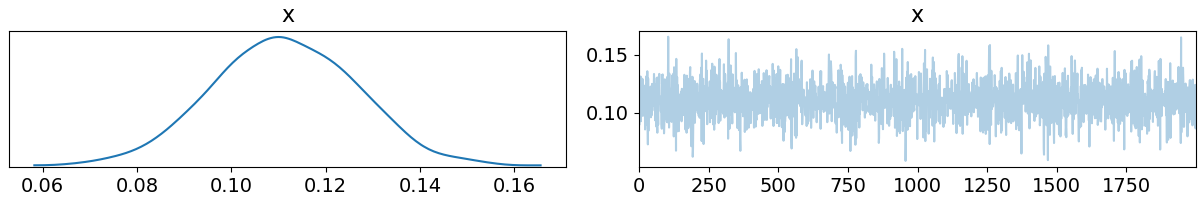

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D82E681C8>,
      dtype=object)

In [15]:
pm.traceplot(robust_trace['r'])

In [16]:
ln=d['high'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,1.02780,1.03400,1.04020,1.04150,1.03320
1,1.03400,1.04020,1.04150,1.03320,1.03050
2,1.04020,1.04150,1.03320,1.03050,1.03410
3,1.04150,1.03320,1.03050,1.03410,1.03700
4,1.03320,1.03050,1.03410,1.03700,1.03160
...,...,...,...,...,...
5162,1.10553,1.10430,1.10385,1.10202,1.10273
5163,1.10430,1.10385,1.10202,1.10273,1.10567
5164,1.10385,1.10202,1.10273,1.10567,1.10899
5165,1.10202,1.10273,1.10567,1.10899,1.10838


In [ ]:
data1=wn.iloc[:,0:2].values
robust_model = analyze_robust1(data1)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Sequential sampling (1 chains in 1 job)
NUTS: [nu, r, sigma, mu]
 31%|████████████████████████▍                                                      | 773/2500 [03:30<09:10,  3.14it/s]